# Distribución t-student 
## Tania Sayuri Guizado Hernández A01640092
Un nutricionista está investigando el contenido de vitamina C en dos tipos de jugo de naranja. Tomó muestras aleatorias de cada tipo de jugo y registró los siguientes niveles promedio de vitamina C en miligramos por 100 ml:

Tipo de jugo A: 20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23.
Tipo de jugo B: 19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18.

Calcula un intervalo de confianza del 99% para la media poblacional del contenido de vitamina C de ambos jugos. 

In [1]:
#Cargamos las librerías que usaremos en la actividad
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import math

**Convierte los datos en un DataFrame. Esto te ayudará a realizar tus cálculos**

In [2]:
data = {
    'Tipo de jugo A': [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23],
    'Tipo de jugo B': [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]
}

df = pd.DataFrame(data)

**Realiza una gráfica QQ-plot para determinar si los datos siguen una distribución normal. Recuerda que por defecto el método QQ-plot compara los datos con una normal estandar. Para obtener un correcto ajuste estandariza los datos o cambia los parámetros de la gráfica QQ-plot.**

In [3]:
#Realizamos la estandarización de los datos con StandarScaler
scaler = StandardScaler()
df_estandar=scaler.fit_transform(df)
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

In [4]:
#Realizamos la estandarización de los datos con la formula
def estandarizar_datos(data):
    mean = np.mean(data)
    std_dev = np.std(data)/math.sqrt(df.shape[0])
    standardized_data = (data - mean) / std_dev
    return standardized_data

df_estandar2 = df.apply(estandarizar_datos)

<Figure size 1200x600 with 0 Axes>

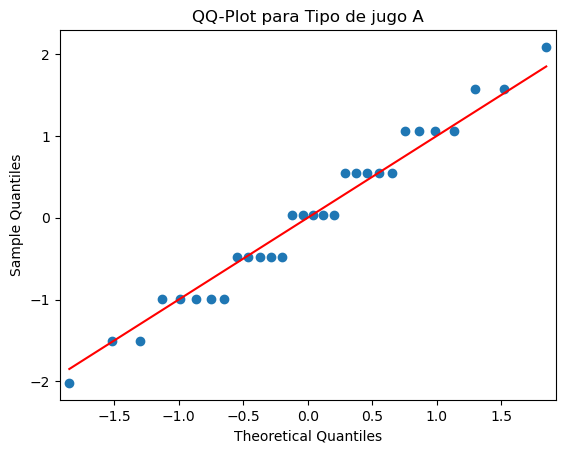

<Figure size 1200x600 with 0 Axes>

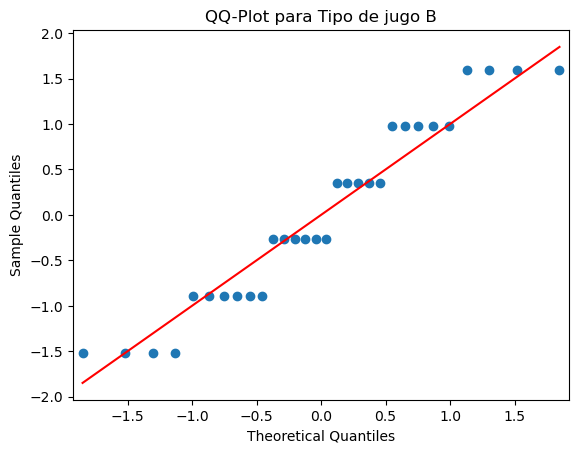

In [5]:
# QQ-plot usando los datos estandarizados por StandardScaler
plt.figure(figsize=(12, 6))
sm.qqplot(df_estandar['Tipo de jugo A'], line='s')
plt.title("QQ-Plot para Tipo de jugo A")
plt.show()

plt.figure(figsize=(12, 6))
sm.qqplot(df_estandar['Tipo de jugo B'], line='s')
plt.title("QQ-Plot para Tipo de jugo B")
plt.show()

<Figure size 1200x600 with 0 Axes>

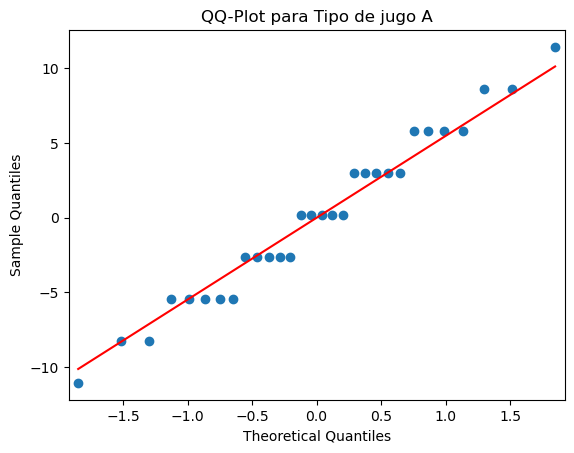

<Figure size 1200x600 with 0 Axes>

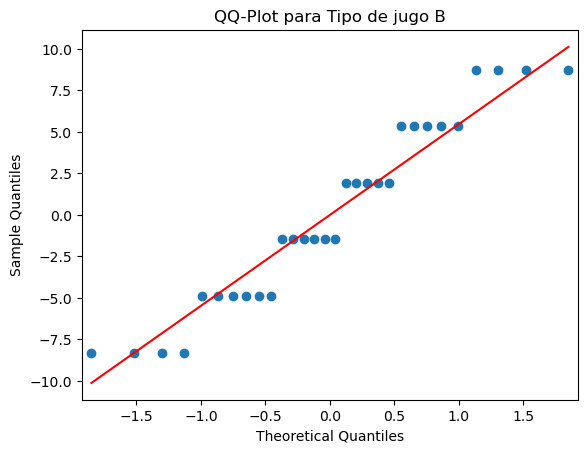

In [6]:
# QQ-plot usando los datos estandarizados con la fórmula
plt.figure(figsize=(12, 6))
sm.qqplot(df_estandar2['Tipo de jugo A'], line='s')
plt.title("QQ-Plot para Tipo de jugo A")
plt.show()

plt.figure(figsize=(12, 6))
sm.qqplot(df_estandar2['Tipo de jugo B'], line='s')
plt.title("QQ-Plot para Tipo de jugo B")
plt.show()

**Aplica el test de Kolmogorov Smirnov para asegurarte si los datos son o no normales. Por defecto el test Kolmogorov compara los datos con una normal estandar, cambia los parámetros o estandariza los datos.**

In [7]:
# Test de Kolmogorov-Smirnov con los datos estandarizados con la formula
ks_statistic_a= stats.kstest(df_estandar2['Tipo de jugo A'], 'norm')
ks_statistic_a

KstestResult(statistic=0.42898782780148464, pvalue=1.5705101005754954e-05, statistic_location=-2.623975209798932, statistic_sign=1)

In [8]:
# Test de Kolmogorov-Smirnov con los datos estandarizados con StandarScaler
ks_statistic_a= stats.kstest(df_estandar['Tipo de jugo A'], 'norm')
ks_statistic_a

KstestResult(statistic=0.11738896673840382, pvalue=0.7596266894154436, statistic_location=-0.4790701375804085, statistic_sign=1)

In [9]:
# Test de Kolmogorov-Smirnov con los datos estandarizados con la formula
ks_statistic_b= stats.kstest(df_estandar2['Tipo de jugo B'], 'norm')
ks_statistic_b

KstestResult(statistic=0.46362578931823245, pvalue=1.9977943958857668e-06, statistic_location=-1.4779726906985362, statistic_sign=1)

In [10]:
# Test de Kolmogorov-Smirnov con los datos estandarizados con StandarScaler
ks_statistic_a= stats.kstest(df_estandar['Tipo de jugo B'], 'norm')
ks_statistic_a

KstestResult(statistic=0.14728331185335664, pvalue=0.4878988806213048, statistic_location=-0.892546569977034, statistic_sign=1)

**En caso de que no sean normales considera que tienen una distribución t-student.**

Debido a que los p-valores son menores a 0.05 se puede decir que las muestras no siguen una distribución normal y por eso es necesario realizar la distribución t-student.

# Intervalo de confianza con t-student

In [11]:
# Parámetros para el intervalo de confianza
confidence_level = 0.99
alpha = (1 - confidence_level) / 2

# Calcular los parámetros necesarios para el intervalo de confianza
meanA = np.mean(df['Tipo de jugo A'])
stdA = np.sqrt(sum((x - meanA)**2 for x in df['Tipo de jugo A']) / (len(df['Tipo de jugo A']) - 1))
sizeA = len(df['Tipo de jugo A'])

meanB = np.mean(df['Tipo de jugo B'])
stdB = np.sqrt(sum((x - meanB)**2 for x in df['Tipo de jugo B']) / (len(df['Tipo de jugo B']) - 1))
sizeB = len(df['Tipo de jugo B'])

# Calcular el valor crítico de la distribución t-student
t_criticalA = 2.750
t_criticalB = 2.750

# Calcular el intervalo de confianza para la diferencia de medias
margin_errorA = t_criticalA * (stdA / np.sqrt(sizeA))
confidence_intervalA = (meanA - margin_errorA, meanA + margin_errorA)
margin_errorB = t_criticalB * (stdB / np.sqrt(sizeB))
confidence_intervalB = (meanB - margin_errorB, meanB + margin_errorB)
ancho = (meanA + margin_errorA) - (meanA - margin_errorA)

print("Intervalo de confianza para Tipo de jugo A:", confidence_intervalA)
print("Ancho:", ancho)
print("Intervalo de confianza para Tipo de jugo B:", confidence_intervalB)

Intervalo de confianza para Tipo de jugo A: (22.93845179665138, 24.92821487001529)
Ancho: 1.9897630733639105
Intervalo de confianza para Tipo de jugo B: (19.613265059846256, 21.25340160682041)
